# Chuẩn bị dữ liệu

In [96]:
import pyodbc
import pandas as pd
import numpy as np
import math

In [2]:
server_name = 'DESKTOP-TOL1F2F\MSSQLSERVERBI'
database_name = 'AdventureWorksDW2012'

connection = pyodbc.connect('Driver={SQL Server}; Server=' + server_name +
                      '; Database=' + database_name +
                      '; Trusted_Connection=yes;')

In [3]:
df = pd.read_sql_query(
    "select YearlyIncome, MaritalStatus, Gender, TotalChildren, NumberChildrenAtHome as ChildrenAtHome,\
        EnglishEducation as Education, EnglishOccupation as Occupation,\
        HouseOwnerFlag as HouseOwner, NumberCarsOwned as CarsOwned, 2012-YEAR(BirthDate) as Age\
    from DimCustomer",
    connection) 

df.head()

,YearlyIncome,MaritalStatus,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HouseOwner,CarsOwned,Age
0,90000.0,M,M,2,0,Bachelors,Professional,1,0,41
1,60000.0,S,M,3,3,Bachelors,Professional,0,1,36
2,60000.0,M,M,3,3,Bachelors,Professional,1,1,41
3,70000.0,S,F,0,0,Bachelors,Professional,0,1,39
4,80000.0,S,F,5,5,Bachelors,Professional,1,4,33


# Thống kê mô tả

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearlyIncome    18484 non-null  float64
 1   MaritalStatus   18484 non-null  object 
 2   Gender          18484 non-null  object 
 3   TotalChildren   18484 non-null  int64  
 4   ChildrenAtHome  18484 non-null  int64  
 5   Education       18484 non-null  object 
 6   Occupation      18484 non-null  object 
 7   HouseOwner      18484 non-null  object 
 8   CarsOwned       18484 non-null  int64  
 9   Age             18484 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,YearlyIncome,MaritalStatus,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HouseOwner,CarsOwned,Age
count,18484.000000,18484,18484,18484.000000,18484.000000,18484,18484,18484,18484.000000,18484.000000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,NaN
top,NaN,M,M,NaN,NaN,Bachelors,Professional,1,NaN,NaN
freq,NaN,10011,9351,NaN,NaN,5356,5520,12502,NaN,NaN
mean,57305.777970,NaN,NaN,1.844352,1.004058,NaN,NaN,NaN,1.502705,43.176531
std,32285.841703,NaN,NaN,1.612408,1.522660,NaN,NaN,NaN,1.138394,11.536142
min,10000.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,26.000000
25%,30000.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,34.000000
50%,60000.000000,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,2.000000,41.000000
75%,70000.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,2.000000,51.000000


In [6]:
for col in df.select_dtypes(include=[object]).columns:
    print(df[col].value_counts())
    print('='*40)

M    10011
S     8473
Name: MaritalStatus, dtype: int64
M    9351
F    9133
Name: Gender, dtype: int64
Bachelors              5356
Partial College        5064
High School            3294
Graduate Degree        3189
Partial High School    1581
Name: Education, dtype: int64
Professional      5520
Skilled Manual    4577
Management        3075
Clerical          2928
Manual            2384
Name: Occupation, dtype: int64
1    12502
0     5982
Name: HouseOwner, dtype: int64


In [7]:
columns_to_be_encoded = ['MaritalStatus', 'Gender', 'Education', 'Occupation', 'HouseOwner']

# Mã hoá dữ liệu

In [8]:
df_1 = pd.concat([df.drop(columns=columns_to_be_encoded),
                pd.get_dummies(df[columns_to_be_encoded])], axis=1)
df_1

,YearlyIncome,TotalChildren,ChildrenAtHome,CarsOwned,Age,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,Education_Bachelors,...,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,HouseOwner_0,HouseOwner_1
0,90000.0,2,0,0,41,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,60000.0,3,3,1,36,0,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
2,60000.0,3,3,1,41,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,70000.0,0,0,1,39,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,80000.0,5,5,4,33,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,30000.0,1,0,0,43,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
18480,30000.0,3,0,0,35,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
18481,30000.0,3,0,0,47,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
18482,30000.0,3,0,0,48,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1


# Trực quan hoá dữ liệu

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.pairplot(df_1)

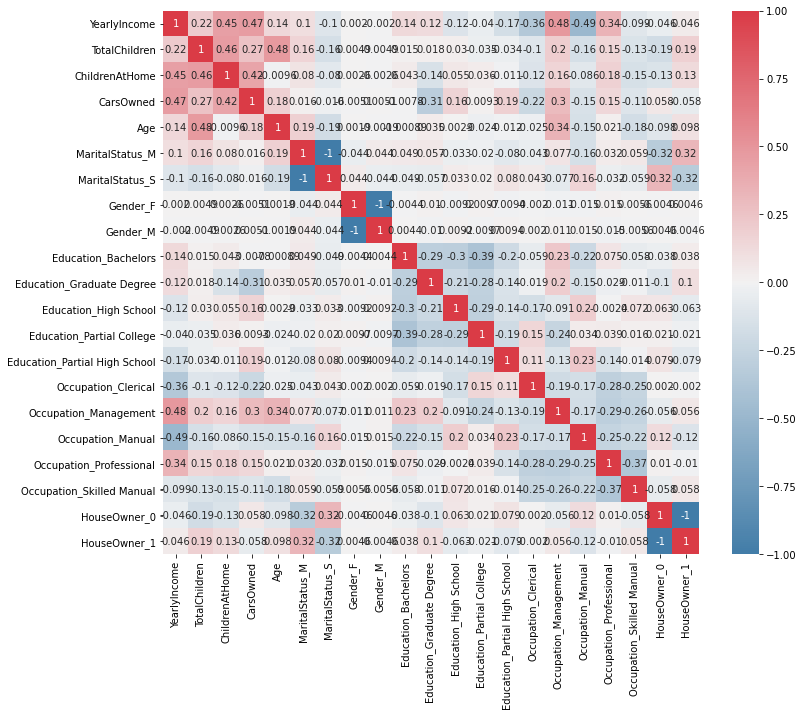

In [10]:
corr = df_1.corr()
f, ax = plt.subplots(figsize=(12, 10))
## diverging_palette: khai báo màu tương ứng với mức độ tương quan
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
## heatmap: biểu đồ nhiệt biểu diễn sự tương quan giữa các cột trong tệp dữ liệu
sns.heatmap(corr, annot=True, cmap=cmap);

# Chọn đặc trưng

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
target = 'YearlyIncome'

In [20]:
y = df_1[[target]]
X = df_1.drop(columns=[target])

In [128]:
k = 7

best_features = SelectKBest(score_func=chi2, k=k)
fit = best_features.fit(X, y)

feature_scores = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.nlargest(k, 'Score')

,Feature,Score
1,ChildrenAtHome,11813.139409
15,Occupation_Manual,10848.192947
13,Occupation_Clerical,5530.775801
2,CarsOwned,4425.581766
14,Occupation_Management,4273.556461
16,Occupation_Professional,3449.542134
0,TotalChildren,3210.481165


In [129]:
selected_features = feature_scores.nlargest(k, 'Score')['Feature'].values
selected_features

array(['ChildrenAtHome', 'Occupation_Manual', 'Occupation_Clerical',
       'CarsOwned', 'Occupation_Management', 'Occupation_Professional',
       'TotalChildren'], dtype=object)

# Xây dựng mô hình

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [131]:
X_train, X_test = train_test_split(df_1[np.append(selected_features, target)],
                                   train_size=.8,
                                   test_size=.2,
                                   random_state=100)
y_train = X_train.pop(target)
y_test = X_test[target]

In [132]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [133]:
lr_model.score(X_train, y_train)

0.7011728906703986

In [134]:
X_train_sm = sm.add_constant(X_train)
sm_lr = sm.OLS(y_train, X_train_sm).fit()
print(sm_lr.params)
print(sm_lr.summary())

const                      48360.427728
ChildrenAtHome              6561.667698
Occupation_Manual         -35832.058469
Occupation_Clerical       -19793.793345
CarsOwned                   3168.006551
Occupation_Management      34570.085423
Occupation_Professional    18097.612397
TotalChildren              -3140.551955
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           YearlyIncome   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4954.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:54:26   Log-Likelihood:            -1.6554e+05
No. Observations:               14787   AIC:                         3.311e+05
Df Residuals:                   14779   BIC:                         3.312e+05
Df Model:                        

In [135]:
y_pred = sm_lr.predict(X_test)
y_pred

16696   -1.884002e+08
10368   -1.884727e+08
16559   -1.884348e+08
4908    -1.883536e+08
14590   -6.282427e+07
             ...     
12074   -1.569916e+08
9110    -1.256415e+08
1083    -2.197345e+08
8707    -2.512475e+08
8987    -1.883804e+08
Length: 3697, dtype: float64

In [136]:
mse = np.mean((y_pred - y_test)**2)
'{:f}'.format(mse)

'43148507144774952.000000'

## Đánh giá bằng K-fold

In [88]:
from sklearn.model_selection import KFold, cross_val_score

In [139]:
kfcv = KFold(n_splits=25, random_state=1, shuffle=True)
cv_model = LinearRegression()
lr_scores = cross_val_score(cv_model, X, y, cv=kfcv, n_jobs=1)
print(f"Accuracy: mean={np.mean(lr_scores)}, std={np.std(lr_scores)}")

Accuracy: mean=0.7187298697147909, std=0.019654891385249507
